In [4]:
import streamlit as st
import pandas as pd
import numpy as np
from IPython.display import Markdown
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.feature_selection import VarianceThreshold
import re
import joblib
import nltk
from nltk.corpus import stopwords
from nltk import tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
import plotly.graph_objects as go
import matplotlib.pyplot as plt

In [5]:
dt = pd.read_csv("../data/interim/data.csv")

In [6]:
dt.shape

(7200, 5)

In [1]:
from streamlit_option_menu import option_menu

In [2]:
import joblib

In [46]:
!pip install streamlit-option-menu

  Using cached streamlit_option_menu-0.3.2-py3-none-any.whl (712 kB)

[notice] A new release of pip available: 22.2.2 -> 22.3.1
[notice] To update, run: pip install --upgrade pip


In [33]:
dt.text[1]

'Dr. Ray peita Bolsonaro, chama-o de \x93conservador fake\x94 em entrevista a Danilo Gentili e divide a direita.\n\nEste site vem avisando Jair Bolsonaro que ele deveria abandonar a pauta estatista de vez e fazer um discurso mais convincente para aquela boa parte dos liberais e conservadores do Brasil que querem se ver livres das amarras estatais.\n\nTudo bem que as pesquisas ainda dizem que a maior parte do povo é contra as privatizações, mas o índice (pouco mais de 50% do povo) é fácil de ser revertido. Ademais, Bolsonaro deveria falar para direitistas em vez de focar tanto em petistas arrependidos.\n\nRecentemente ele disse que \x93pensaria 200 vezes antes de privatizar a Petrobrás para que ela não caia nas mãos de chineses\x94 (ou algo do tipo). Deveria ter dito: \x93Eu garanto a privatização da Petrobrás, e também garanto que chineses não irão comprá-la\x94. Isso não deixaria brechas. Do jeito que ele falou, parece que o suposto \x93medo de venda aos chineses\x94 é pretexto para e

In [6]:
nltk.download('rslp')

[nltk_data] Downloading package rslp to
[nltk_data]     /home/rafaelxavier/nltk_data...
[nltk_data]   Package rslp is already up-to-date!


True

In [7]:
token_space = tokenize.WhitespaceTokenizer()

In [15]:
pipe_lr = joblib.load(
        "../models/model_RandomForestClassifier_with_stop_words_stemma.joblib"
    )

pipe_pp = joblib.load(
    open(
        "../models/preprocessor.joblib",
        "rb"
    )
)
# funções

# def predict_model(docx):
#     results = pipe_lr.predict([docx])
#     return results[0]

In [13]:
text1 = "Os mais de 60 milhões de votos recebidos por Luiz Inácio Lula da Silva (PT) no segundo turno são a maior votação obtida por um candidato à Presidência desde a redemocratização, quando foram instituídas as eleições em dois turnos."

In [14]:
text = """Luiz Inácio Lula da Silva (PT) é o novo presidente da República. Ele venceu o atual presidente, Jair Messias Bolsonaro (PL), que pleiteava a reeleição no segundo turno das Eleições Gerais de 2022.

Às 19h56 deste domingo (30), com 98,91% das urnas apuradas, Lula foi considerado eleito após receber 59.563.912 votos (50,83% dos votos válidos), contra 57.675.427 votos (49,17% dos votos válidos) de Bolsonaro.

O número de votos válidos, até aquele horário, foi de 117.305.567. Foram registrados 1.751.415 votos brancos (1,43%) e 3.889.466 votos nulos (3,16%). A abstenção chegou a 20,90%."""

In [16]:
dataframe = {"texto": [text]}
df = pd.DataFrame(dataframe)

In [17]:
class Processing():
    
    # retirando pontuação
    def clean_dots(self, df):
        df["texto"]=df.texto.apply(lambda x : x.lower())
        df["texto"]=df.texto.apply(lambda x : re.sub('[^\w\s]', '', x))
        return df
   
    # fazendo stemmatização
    def stemma(self, df):
        stemmer = nltk.stem.RSLPStemmer()
        frase_processada = list()
        for text in df["texto"]:
            #para cada frase acessada vamos tokeniza-la e verificar se cada token 
            #é pertecentes a nossa lista de stop
            #words
            nova_frase = list()
            palavras_texto = token_space.tokenize(text)
            for palavra in palavras_texto:
                nova_frase.append(stemmer.stem(palavra)) #stemmatização de cada palavra da sentença
            frase_processada.append(' '.join(nova_frase))
        
        df["text"]=frase_processada
        return df

    
    # Criando bag of words
    def vetorizing(self, df):
        # st.write(pipe_pp)
        return pipe_pp.transform(df["text"])
    

In [18]:
processing = Processing()

In [19]:
df2 = processing.clean_dots(df)
df2 = processing.stemma(df2)
bag = processing.vetorizing(df2)

In [20]:
def predict_model(docx):
    results = pipe_lr.predict(docx)
    return results

In [21]:
resultado = pipe_lr.predict(bag)

/home/rafaelxavier/.cache/pypoetry/virtualenvs/src-oDiRjDCQ-py3.8/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [22]:
resultado = predict_model(bag)

In [23]:
resultado[0]

0

In [123]:
# pipe = Pipeline([
#     "PreProcessing", PreProcessing.clean_dots(),
#     "stemma", PreProcessing.stemma(),
#     "bag_of_words", PreProcessing.vetorizing()
# ])

In [42]:
# plt.figure(figsize=(12,12))
fig = go.Figure(go.Indicator(
    domain = {'x': [0, 1], 'y': [0, 1]},
    value = 90,
    mode = "gauge+number+delta",
    title = {'text': "Probabilidade"},
    delta = {'reference': 380},
    gauge = {'axis': {'range': [None, 100]},
             'steps' : [
                 {'range': [0, 40], 'color': "lightgray"},
                 {'range': [40, 60], 'color': "gray"}],
             'threshold' : {'line': {'color': "red", 'width': 4}, 'thickness': 0.75, 'value': 100}}))

# fig.show()

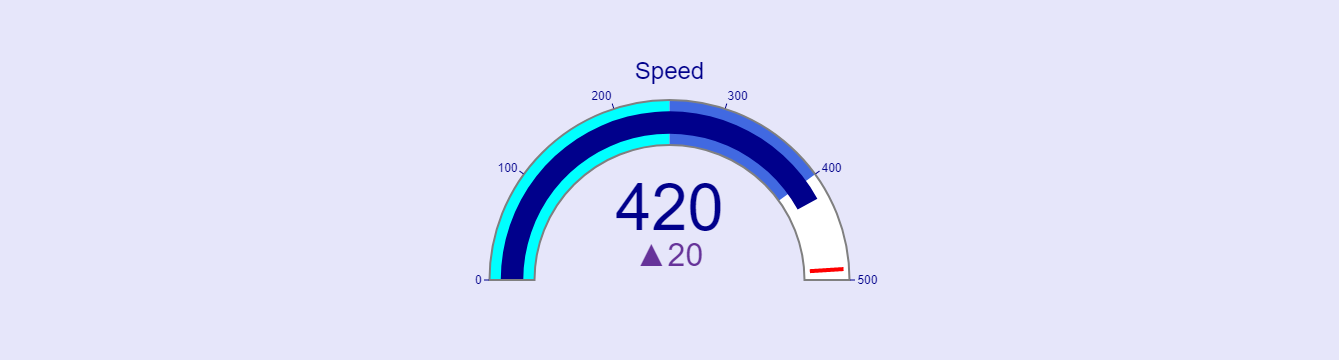

In [43]:
import plotly.graph_objects as go

fig = go.Figure(go.Indicator(
    mode = "gauge+number+delta",
    value = 420,
    domain = {'x': [0, 1], 'y': [0, 1]},
    title = {'text': "Speed", 'font': {'size': 24}},
    delta = {'reference': 400, 'increasing': {'color': "RebeccaPurple"}},
    gauge = {
        'axis': {'range': [None, 500], 'tickwidth': 1, 'tickcolor': "darkblue"},
        'bar': {'color': "darkblue"},
        'bgcolor': "white",
        'borderwidth': 2,
        'bordercolor': "gray",
        'steps': [
            {'range': [0, 250], 'color': 'cyan'},
            {'range': [250, 400], 'color': 'royalblue'}],
        'threshold': {
            'line': {'color': "red", 'width': 4},
            'thickness': 0.75,
            'value': 490}}))

fig.update_layout(paper_bgcolor = "lavender", font = {'color': "darkblue", 'family': "Arial"})

fig.show()